In [2]:
%autoreload 2
%config Completer.use_jedi = False
%matplotlib inline
import thickness_sim
from math import pi, ceil, floor
from numpy import linspace
from random import random
import pandas as pd

In [3]:
net = thickness_sim.NetModel()

In [4]:
net.create_net(100,100,pi/4,pi/4,40,1,.03)

In [5]:
net.set_thickness(.030)
# net.td_variator(1,.001)
# net.md_variator(1,.001)
net.indie_variator(1,.001)
net.outdie_variator(1,.001)

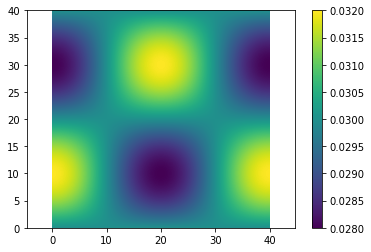

In [6]:
net.plot_2d_contour()

In [7]:
n_pts = 1000
min_y_step = 24
max_y_step = 30
min_x_step = 2 / net.net_width
max_x_step = 4 / net.net_width
edge_margin = 2 / net.net_width
x = edge_margin
y = 0
pts = []
direction = 1
for pt in range(n_pts):
    pts.append((x, y))
    x_step = min_x_step + random() * (max_x_step - min_x_step)
    if direction > 0:
        if x + x_step > 1 - edge_margin:
            x_step = (1 - edge_margin - x) * random()
            direction *= -1
    else:
        x_step *= -1
        if x + x_step <= edge_margin:
            x_step = (edge_margin - x) * random()
            direction *= -1
    x += x_step
    y = min_y_step + random() * (max_y_step - min_y_step)
    

In [8]:
net.clear_probe_pts()
net.add_probe_pts_from_list(pts)

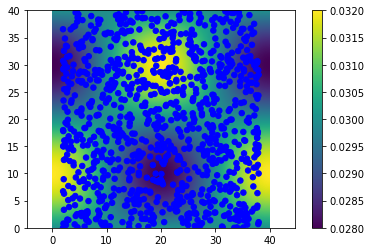

In [9]:
net.plot_2d_contour()

In [10]:
net.execute_probe()

In [11]:
net.print_net_stats()
net.print_probe_stats()

Width = 40.00 Length = 40.00 Target Thickness = 0.030
Number of knots: 20201
Number of slots in inside die: 100
Number of slots in outside die: 100
Net is symmetrical, angle = 90.0 deg.
Thickness average of all knots = 0.0300
Thickness max = 0.0320, min = 0.0280, range = 0.0040

Number of samples = 1000
Average thickness = 0.0302
Max thickness = 0.0320
Min thickness = 0.0280
Thickness range = 0.0040




In [12]:
x = []
y = []
thkns = []

for dp in net.probe_samples:
    x.append(dp[0][0])
    y.append(dp[0][1])
    thkns.append(dp[1] - net.net_thickness)

probe_dict = {}
probe_dict['x'] = x
probe_dict['y'] = y
probe_dict['thkns'] = thkns

probe_df = pd.DataFrame(probe_dict)

display(probe_df)

,x,y,thkns
0,2.000000,0.000000,0.000243
1,5.425215,26.952063,-0.000939
2,7.584448,50.989573,0.001006
3,10.836652,75.816689,0.000342
4,14.531792,105.590364,0.001185
...,...,...,...
995,27.611847,26847.048592,-0.000389
996,24.631148,26875.754573,0.001123
997,20.643817,26904.834588,0.001573
998,18.034267,26933.102172,-0.001504


In [13]:

y_max = probe_df['y'].max()
grid_size_approx = (4, 4)
grid_size = ((net.net_width / ceil(net.net_width / grid_size_approx[0])),
             y_max / ceil(y_max / grid_size_approx[1]))
print(grid_size)


(4.0, 3.9994527326301688)


In [ ]:
%matplotlib ipympl